<a href="https://colab.research.google.com/github/liudongliangHI/Colab/blob/master/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 载入数据集

In [0]:
train_dataset = pd.read_csv('sample_data/california_housing_train.csv')
test_dataset = pd.read_csv('sample_data/california_housing_test.csv')

# 分析数据

In [0]:
 train_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
train_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
train_dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


# X / Y 数据分离

In [0]:
train_feature = train_dataset.drop(['median_house_value'], axis=1)
train_label = train_dataset.median_house_value
train_label = train_label / 10000

In [0]:
test_feature = test_dataset.drop(['median_house_value'], axis=1)
test_label = test_dataset.median_house_value
test_label = test_label / 10000

# 归一化数据

In [0]:
train_stats = train_feature.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [0]:
train_feature = norm(train_feature)
test_feature = norm(test_feature)

In [0]:
train_label.tail()

16995    11.14
16996     7.90
16997    10.36
16998     8.58
16999     9.46
Name: median_house_value, dtype: float64

In [0]:
train_feature.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16995,-2.342894,2.318197,1.859916,-0.195722,-0.344985,-0.455262,-0.343862,-0.799975
16996,-2.347881,2.369663,0.588757,-0.135170,-0.027072,-0.205230,-0.094200,-0.715705
16997,-2.362842,2.907715,-0.920744,0.015292,-0.019955,-0.161670,-0.117606,-0.446650
16998,-2.362842,2.889000,-0.761850,0.012998,0.029868,-0.114626,-0.060392,-0.997758
16999,-2.387778,2.299482,1.859916,-0.377837,-0.567998,-0.543252,-0.601325,-0.455349


# 构建模型

模型非常的简单但有效，采用三层全连接网络

## 代码实现

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [0]:
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_feature.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

检查模型结构

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


# 训练模型

In [0]:
EPOCHS = 1000

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
    train_feature, train_label,
    epochs=EPOCHS, batch_size=10240,
    validation_split=0.1,
    verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [0]:
hist.head()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
0,754.436768,24.077389,754.436768,546.714689,20.424079,546.714689,0
1,741.109131,23.795401,741.109131,530.547606,20.025834,530.547606,1
2,729.814331,23.550991,729.814331,519.339332,19.741432,519.339332,2
3,719.294434,23.320097,719.294434,509.446311,19.485505,509.446311,3
4,709.056763,23.093204,709.056763,500.034135,19.240042,500.034135,4


In [0]:
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,55.930019,5.451097,55.930019,27.900315,3.660041,27.900315,995
996,57.698418,5.527229,57.698418,27.946161,3.670970,27.946161,996
997,58.626324,5.521572,58.626324,27.866115,3.654474,27.866115,997
998,56.286121,5.491154,56.286121,28.063493,3.669041,28.063493,998
999,56.889656,5.480361,56.889656,28.180393,3.708848,28.180393,999


In [0]:
hist.describe()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,87.455214,6.659679,87.455214,46.861697,4.506191,46.861697,499.500000
std,100.071273,2.861676,100.071273,65.964133,2.296143,65.964133,288.819436
min,55.930019,5.451097,55.930019,27.693417,3.625447,27.693417,0.000000
25%,59.625796,5.687455,59.625796,29.058886,3.762369,29.058886,249.750000
50%,61.891815,5.903722,61.891815,30.757025,3.873562,30.757025,499.500000
75%,64.061554,5.979964,64.061554,34.381897,4.133148,34.381897,749.250000
max,754.436768,24.077389,754.436768,546.714689,20.424079,546.714689,999.000000


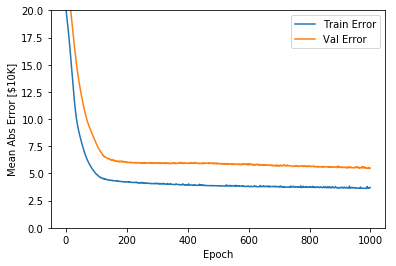

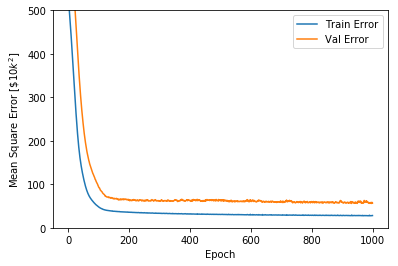

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [$10K]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0, 20])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$\$10k^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0, 500])
  plt.legend()
  plt.show()


plot_history(history)

# 预测

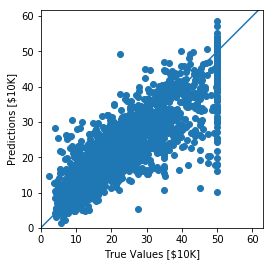

In [0]:
test_predictions = model.predict(test_feature).flatten()

plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [$10K]')
plt.ylabel('Predictions [$10K]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])